### The behaviour of charged particles (ions) during new particle formation events in urban Leipzig (Germany)
https://doi.org/10.5194/egusphere-2024-742 

The aim of this paper was to better understand the behaviour of charged particles and their behaviour during atmospheric NPF in an urban environment.

The air ion/charged particle population was mobility classified into small (0.8–1.6 nm), intermediate (1.6–7.5 nm), and large particles (7.5–22 nm) for analysis, following the classification system outlined by Tammet (2006).

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/home/coliewo/Desktop/analysis/combined_test1.nc'
data = xr.open_dataset(file_path)

#To convert the diameter values to nm
dataset = data.assign_coords(diameter=data['diameter'] * 1e9)

In [3]:
neg_ions = dataset.neg_ions
pos_ions = dataset.pos_ions

#### Be careful overwritting variable outputs...

In [4]:
# Divide the data into the small, large, and intermediate particles
small_neg_ions = neg_ions.sel(diameter=slice(0.8,1.6))
small_pos_ions = pos_ions.sel(diameter=slice(0.8,1.6))
intermediate_neg_ions = neg_ions.sel(diameter=slice(1.6,7.5))
intermediate_pos_ions = pos_ions.sel(diameter=slice(1.6,7.5))
large_neg_ions = neg_ions.sel(diameter=slice(7.5,22.0))
large_pos_ions = pos_ions.sel(diameter=slice(7.5,22.0))     

In [5]:
# Mean over each diameter range
small_neg_i = small_neg_ions.mean(dim='diameter')
small_pos_i = small_pos_ions.mean(dim='diameter')
intermediate_neg_i = intermediate_neg_ions.mean(dim='diameter')
intermediate_pos_i = intermediate_pos_ions.mean(dim='diameter')
large_neg_i = large_neg_ions.mean(dim='diameter')
large_pos_i = large_pos_ions.mean(dim='diameter')

In [6]:
small_neg_i

<xarray.DataArray 'neg_ions' (time: 1081)>
array([          nan,           nan,           nan, ...,  891.41525994,
        910.23677543, 1375.60957566])
Coordinates:
  * time     (time) datetime64[ns] 2024-05-16 2024-05-16T01:00:00 ... 2024-06-30

In [7]:
#Diurnal cycles
small_neg_ions_diurnal_variation = small_neg_i.groupby(small_neg_i.time.dt.hour).mean(dim='time')
small_pos_ions_diurnal_variation = small_pos_i.groupby(small_pos_i.time.dt.hour).mean(dim='time')
intermediate_neg_ions_diurnal_variation = intermediate_neg_i.groupby(intermediate_neg_i.time.dt.hour).mean(dim='time')
intermediate_pos_ions_diurnal_variation = intermediate_pos_i.groupby(intermediate_pos_i.time.dt.hour).mean(dim='time')
large_neg_ions_diurnal_variation = large_neg_i.groupby(large_neg_i.time.dt.hour).mean(dim='time')
large_pos_ions_diurnal_variation = large_pos_i.groupby(large_pos_i.time.dt.hour).mean(dim='time')


In [8]:
small_neg_ions_diurnal_variation

<xarray.DataArray 'neg_ions' (hour: 24)>
array([1051.02431666, 1063.52821825, 1113.34851996, 1074.70670934,
       1044.54715617,  975.9223656 ,  904.92192732,  723.82549725,
        656.19143197,  596.31851947,  594.79731303,  602.53085634,
        647.34274411,  680.20264027,  740.26514832,  718.79580451,
        775.83341434,  776.68592383,  772.52103215,  790.45460343,
        807.75168665,  849.77515373,  936.25125438, 1000.77680871])
Coordinates:
  * hour     (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23

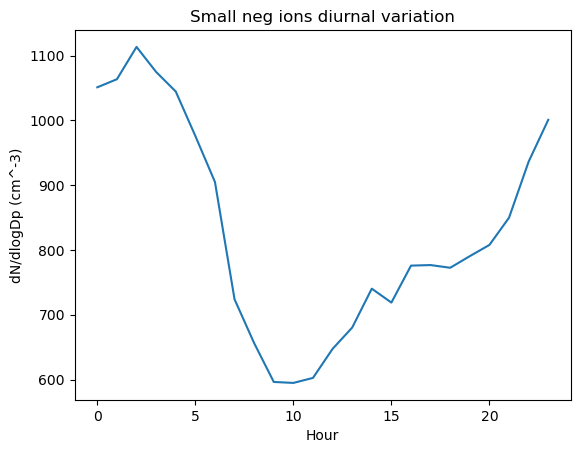

In [9]:
#plot
plt.plot(small_neg_ions_diurnal_variation['hour'], small_neg_ions_diurnal_variation.values) 

plt.xlabel('Hour') 
plt.ylabel('dN/dlogDp (cm^-3)')
plt.title('Small neg ions diurnal variation')

plt.show()

In [10]:
#standard error of the mean (SEM)
small_neg_ions_SEM = small_neg_i.groupby(small_neg_i.time.dt.hour).std(dim='time') / np.sqrt(45)
small_pos_ions_SEM = small_pos_i.groupby(small_pos_i.time.dt.hour).std(dim='time') / np.sqrt(45)
intermediate_neg_ions_SEM = intermediate_neg_i.groupby(intermediate_neg_i.time.dt.hour).std(dim='time') / np.sqrt(45)
intermediate_pos_ions_SEM = intermediate_pos_i.groupby(intermediate_pos_i.time.dt.hour).std(dim='time') / np.sqrt(45)
large_neg_ions_SEM = large_neg_i.groupby(large_neg_i.time.dt.hour).std(dim='time') / np.sqrt(45)
large_pos_ions_SEM = large_pos_i.groupby(large_pos_i.time.dt.hour).std(dim='time') / np.sqrt(45)


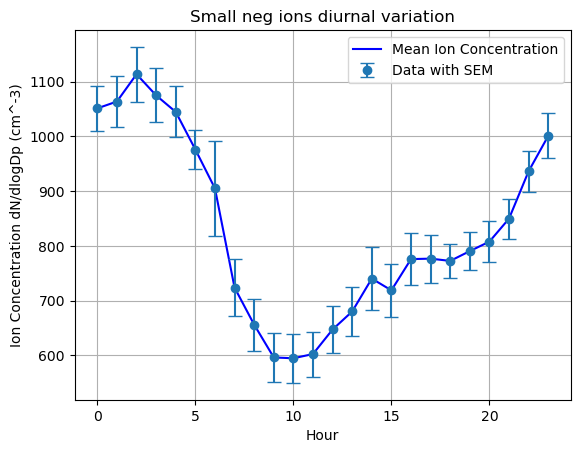

In [11]:
# Plot data
plt.plot(small_neg_ions_diurnal_variation['hour'], small_neg_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(small_neg_ions_diurnal_variation['hour'], small_neg_ions_diurnal_variation.values, yerr=small_neg_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.title('Small neg ions diurnal variation')

plt.legend()
plt.grid(True)
plt.show()

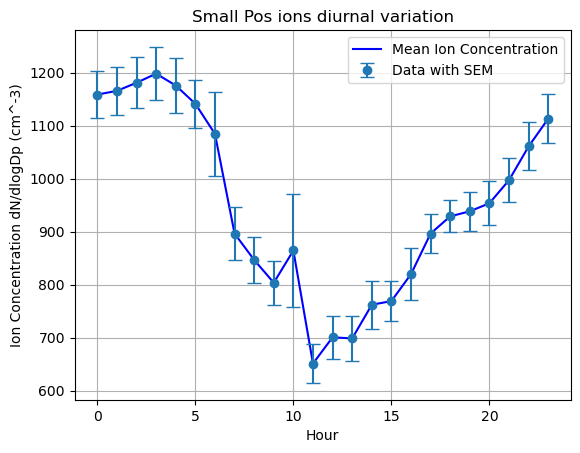

In [12]:
# Plot data
plt.plot(small_pos_ions_diurnal_variation['hour'], small_pos_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(small_pos_ions_diurnal_variation['hour'], small_pos_ions_diurnal_variation.values, yerr=small_pos_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.title('Small Pos ions diurnal variation')

plt.legend()
plt.grid(True)
plt.show()

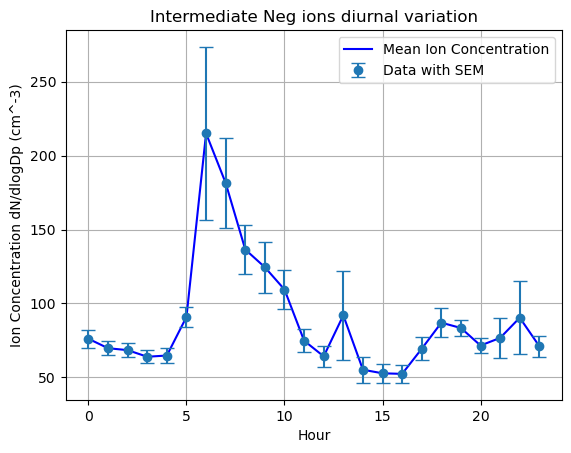

In [13]:
# Plot data
plt.plot(intermediate_neg_ions_diurnal_variation['hour'], intermediate_neg_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(intermediate_neg_ions_diurnal_variation['hour'], intermediate_neg_ions_diurnal_variation.values, yerr=intermediate_neg_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.title('Intermediate Neg ions diurnal variation')

plt.legend()
plt.grid(True)
plt.show()

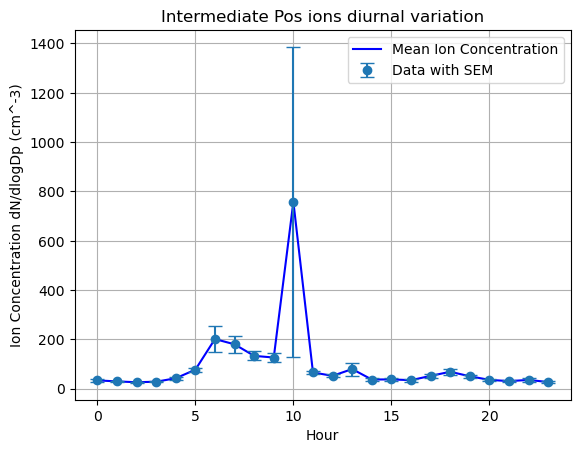

In [14]:
# Plot data
plt.plot(intermediate_pos_ions_diurnal_variation['hour'], intermediate_pos_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(intermediate_pos_ions_diurnal_variation['hour'], intermediate_pos_ions_diurnal_variation.values, yerr=intermediate_pos_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.title('Intermediate Pos ions diurnal variation')

plt.legend()
plt.grid(True)
plt.show()

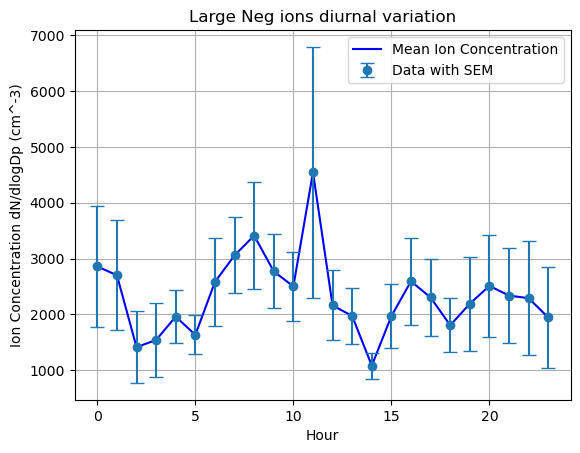

In [15]:
# Plot data
plt.plot(large_neg_ions_diurnal_variation['hour'], large_neg_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(large_neg_ions_diurnal_variation['hour'], large_neg_ions_diurnal_variation.values, yerr=large_neg_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.title('Large Neg ions diurnal variation')

plt.legend()
plt.grid(True)
plt.show()

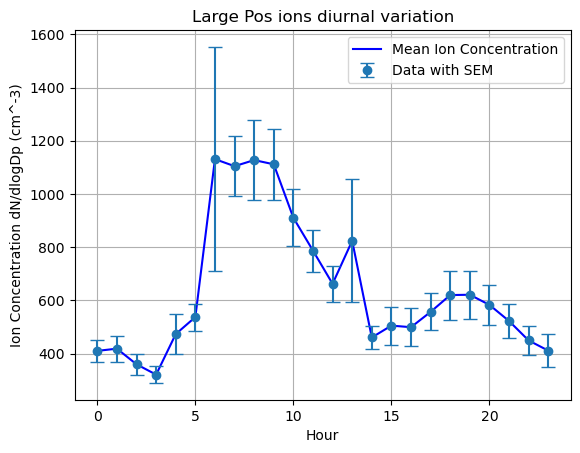

In [16]:
# Plot data
plt.plot(large_pos_ions_diurnal_variation['hour'], large_pos_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(large_pos_ions_diurnal_variation['hour'], large_pos_ions_diurnal_variation.values, yerr=large_pos_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.title('Large Pos ions diurnal variation')

plt.legend()
plt.grid(True)
plt.show()

#### Meteorological variables

In [17]:
met = pd.read_csv('/home/coliewo/Desktop/data/meteo/met_may_jun24.txt')  
#new column for datetime
met['Date'] = pd.to_datetime(met['#date'] + ' ' + met['time'])
# Set datetime as index
met.set_index('Date', inplace=True)

In [18]:
# Descriptive Statistics to identify any outliers in the data??
met.describe()

,day_dec,WD_min[Deg],WD_ave[Deg],WD_max[Deg],WS_min[m/s],WS_ave[m/s],WS_max[m/s],T_air[C],T_internal[C],RH[%%],...,Rain_intensity[mm/h],Hail_acc[hits/cm2],Hail_duration[s],Hail_intensity[hits/cm2],Rain_peak_int[mm/h],Hail_peak_int[hits/cm2],T_heat[C],V_heat[V],Vsupply[V],Vref3.5[V]
count,87480.000000,87312.000000,87312.000000,87312.000000,87312.000000,87312.000000,87312.000000,87312.000000,87312.000000,87312.000000,...,87480.000000,87480.000000,87478.000000,87478.000000,87478.000000,87478.000000,87478.000000,87478.0,87478.000000,87478.000000
mean,151.526396,185.820105,184.391158,185.135239,0.683900,1.745050,2.872162,21.439657,22.102361,55.095889,...,0.087490,0.000080,0.000457,0.000046,74.132740,0.867430,22.666536,0.0,9.654152,3.500886
std,17.622732,94.547636,89.372954,91.027029,0.507532,0.945312,1.495695,4.674831,5.077917,15.270463,...,1.104268,0.016735,0.067620,0.006762,29.859702,0.991173,6.201667,0.0,0.065663,0.004000
min,121.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,9.300000,9.500000,23.000000,...,0.000000,0.000000,0.000000,0.000000,32.900000,0.000000,8.100000,0.0,9.400000,3.492000
25%,136.269271,105.000000,90.600000,100.000000,0.300000,1.000000,1.800000,17.900000,18.100000,42.800000,...,0.000000,0.000000,0.000000,0.000000,44.700000,0.000000,17.600000,0.0,9.600000,3.498000
50%,151.546180,197.000000,198.300000,202.000000,0.600000,1.600000,2.700000,21.000000,21.600000,53.800000,...,0.000000,0.000000,0.000000,0.000000,66.400000,0.000000,22.000000,0.0,9.700000,3.500000
75%,166.806423,252.000000,235.800000,239.000000,0.900000,2.300000,3.700000,24.600000,25.600000,67.400000,...,0.000000,0.000000,0.000000,0.000000,106.300000,2.000000,27.200000,0.0,9.700000,3.506000
max,181.999306,359.000000,360.000000,359.000000,4.800000,8.100000,15.700000,35.600000,37.300000,87.400000,...,94.300000,3.500000,10.000000,1.000000,106.300000,2.000000,40.500000,0.0,9.800000,3.511000


In [19]:
#Keep only relevant data?
# Create a second DataFrame with fewer columns
columns_to_keep = ['T_air[C]', 'RH[%%]', 'Rain_acc[mm]', 'WD_ave[Deg]', 'WS_ave[m/s]']
met2 = met[columns_to_keep]

In [20]:
# Convert Mean over each diameter range to a pandas DataFrame
small_neg_i = small_neg_i.to_dataframe().reset_index()
small_neg_i['time'] = pd.to_datetime(small_neg_i['time'])
small_neg_i_df = small_neg_i.set_index('time')

In [23]:
# Convert Mean over each diameter range to a pandas DataFrame
small_pos_i = small_pos_i.to_dataframe().reset_index()
small_pos_i['time'] = pd.to_datetime(small_pos_i['time'])
small_pos_i_df = small_pos_i.set_index('time')

In [22]:
# Convert Mean over each diameter range to a pandas DataFrame
intermediate_neg_i = intermediate_neg_i.to_dataframe().reset_index()
intermediate_neg_i['time'] = pd.to_datetime(intermediate_neg_i['time'])
intermediate_neg_i_df = intermediate_neg_i.set_index('time')

In [25]:
# Convert Mean over each diameter range to a pandas DataFrame
intermediate_pos_i = intermediate_pos_i.to_dataframe().reset_index()
intermediate_pos_i['time'] = pd.to_datetime(intermediate_pos_i['time'])
intermediate_pos_i_df = intermediate_pos_i.set_index('time')

In [24]:
# Convert Mean over each diameter range to a pandas DataFrame
large_neg_i = large_neg_i.to_dataframe().reset_index()
large_neg_i['time'] = pd.to_datetime(large_neg_i['time'])
large_neg_i_df = large_neg_i.set_index('time')

In [26]:
# Convert Mean over each diameter range to a pandas DataFrame
large_pos_i = large_pos_i.to_dataframe().reset_index()
large_pos_i['time'] = pd.to_datetime(large_pos_i['time'])
large_pos_i_df = large_pos_i.set_index('time')

In [27]:
# Merge the two datasets on the time index
merged_small_neg_df = pd.merge(small_neg_i_df, met2, left_index=True, right_index=True, how='inner')
merged_small_pos_df = pd.merge(small_pos_i_df, met2, left_index=True, right_index=True, how='inner')
merged_intermediate_neg_df = pd.merge(intermediate_neg_i_df, met2, left_index=True, right_index=True, how='inner')
merged_intermediate_pos_df = pd.merge(intermediate_pos_i_df, met2, left_index=True, right_index=True, how='inner')
merged_large_neg_df = pd.merge(large_neg_i_df, met2, left_index=True, right_index=True, how='inner')
merged_large_pos_df = pd.merge(large_pos_i_df, met2, left_index=True, right_index=True, how='inner')

In [28]:
merge = pd.merge(small_neg_i_df,small_pos_i_df, left_index=True, right_index=True, how='inner')

In [29]:
merge = pd.merge(merge, intermediate_neg_i_df,left_index=True, right_index=True, how='inner')

In [30]:
merge = pd.merge(merge, intermediate_pos_i_df,left_index=True, right_index=True, how='inner')

In [31]:
merge = pd.merge(merge, large_neg_i_df,left_index=True, right_index=True, how='inner')

In [32]:
merge = pd.merge(merge, large_pos_i_df,left_index=True, right_index=True, how='inner')

In [33]:
merge = pd.merge(merge, met2,left_index=True, right_index=True, how='inner')

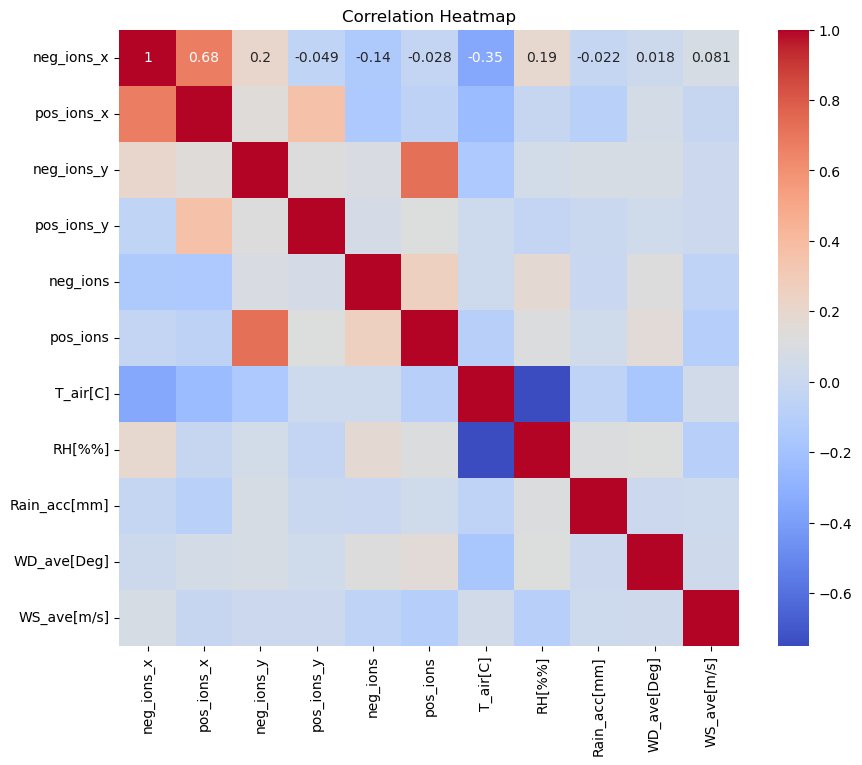

In [34]:
# Correlation Heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(merge.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Manually identify NPF events
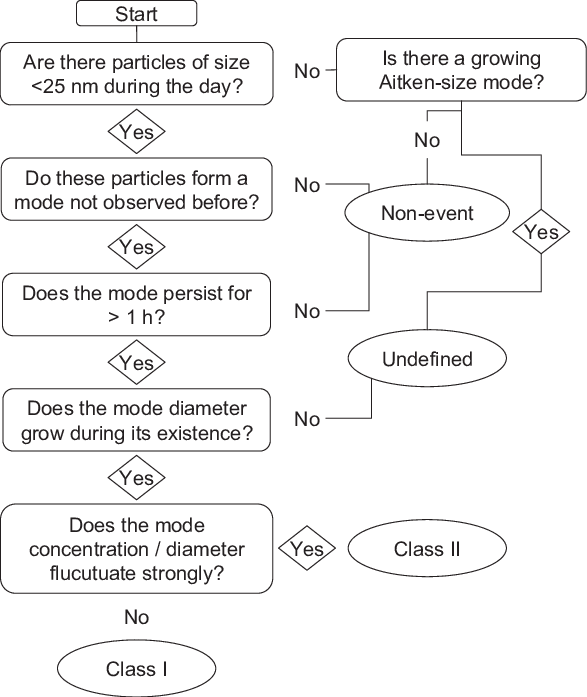

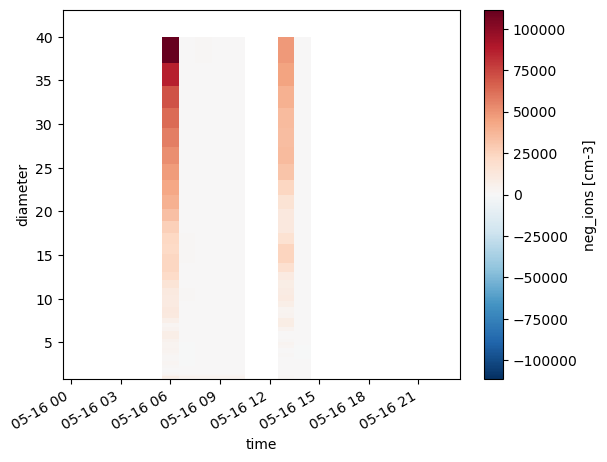

In [45]:
neg_ions.sel(time='2024-05-16').T.plot()

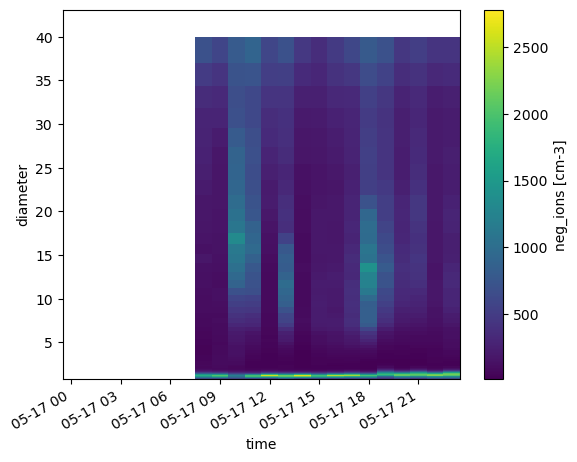

In [46]:
neg_ions.sel(time='2024-05-17').T.plot()

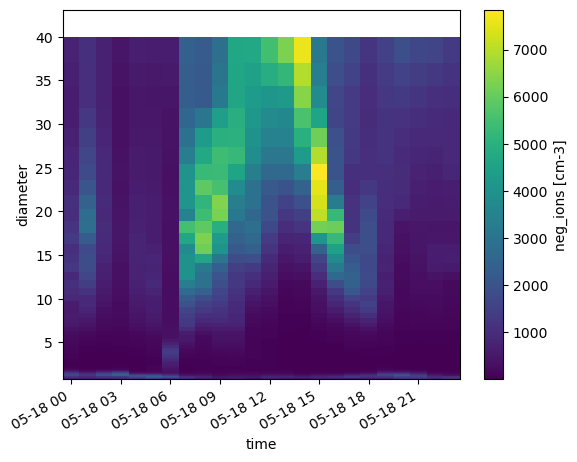

In [47]:
neg_ions.sel(time='2024-05-18').T.plot()

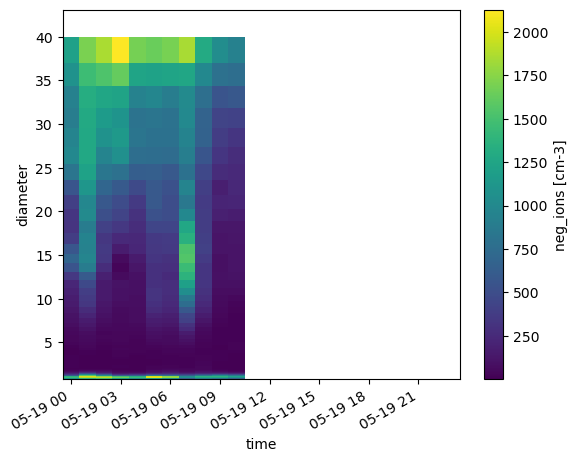

In [48]:
neg_ions.sel(time='2024-05-19').T.plot()

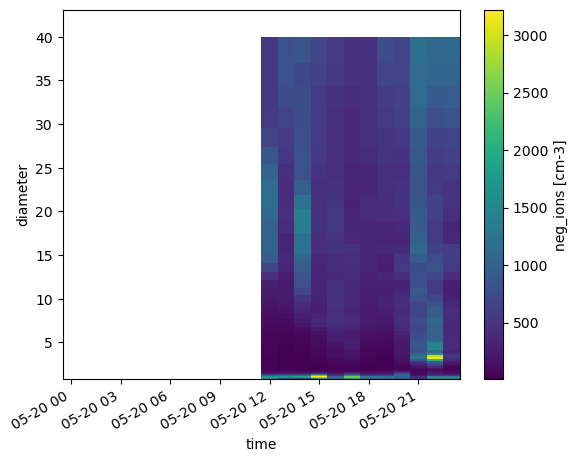

In [49]:
neg_ions.sel(time='2024-05-20').T.plot()

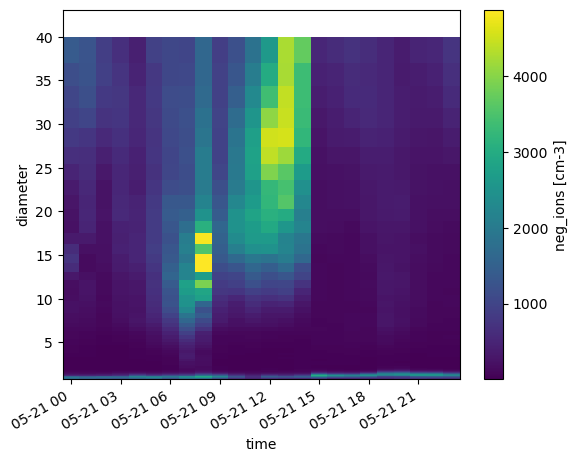

In [50]:
neg_ions.sel(time='2024-05-21').T.plot()

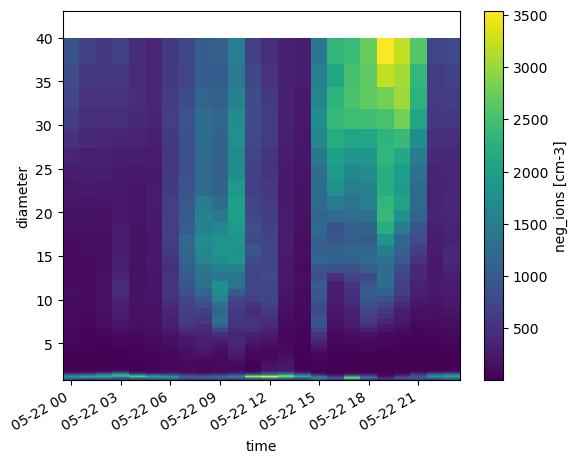

In [51]:
neg_ions.sel(time='2024-05-22').T.plot()

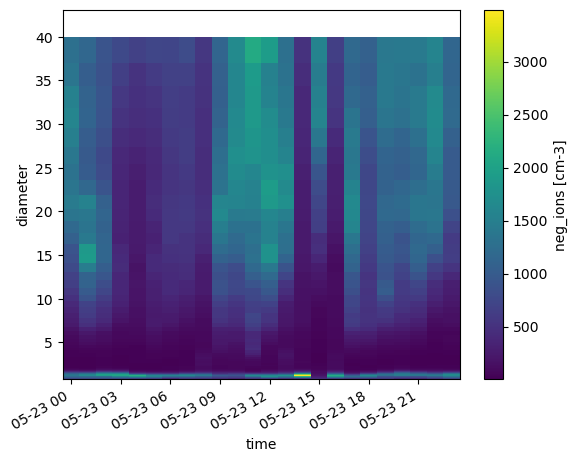

In [52]:
neg_ions.sel(time='2024-05-23').T.plot()

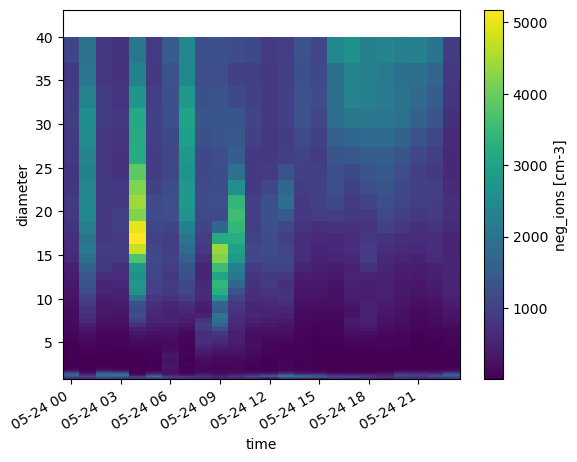

In [53]:
neg_ions.sel(time='2024-05-24').T.plot()

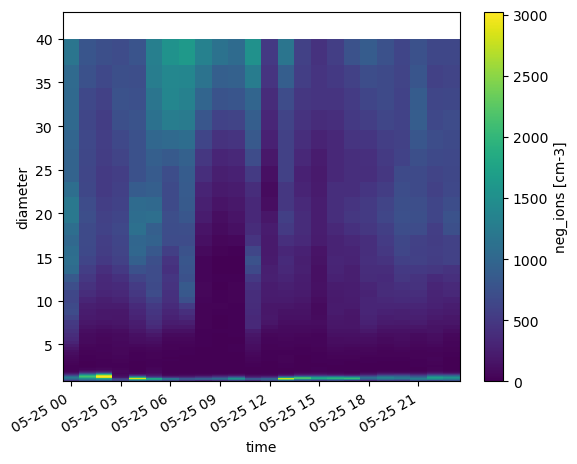

In [54]:
neg_ions.sel(time='2024-05-25').T.plot()

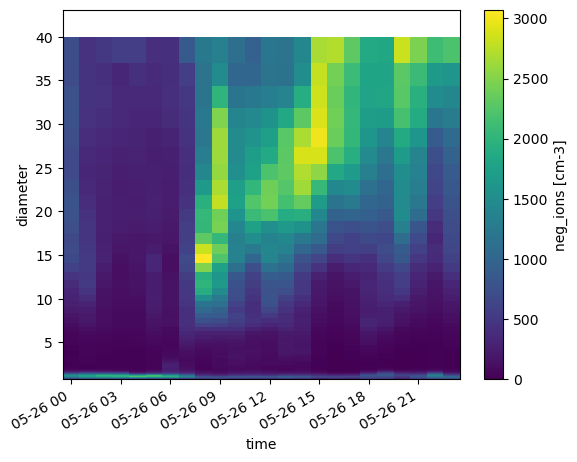

In [55]:
neg_ions.sel(time='2024-05-26').T.plot()

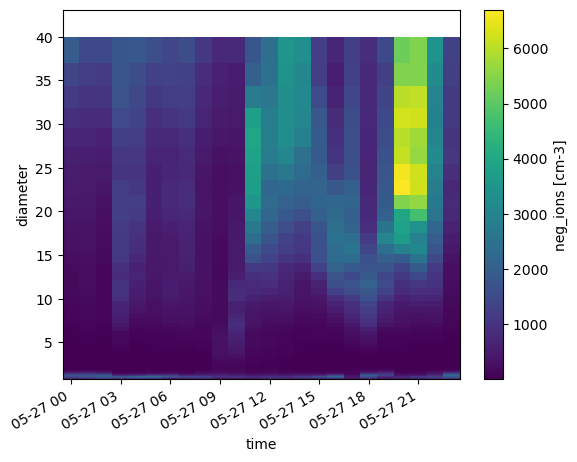

In [56]:
neg_ions.sel(time='2024-05-27').T.plot()

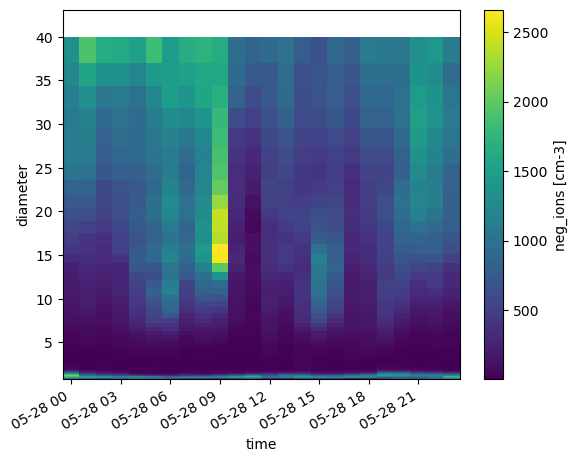

In [57]:
neg_ions.sel(time='2024-05-28').T.plot()

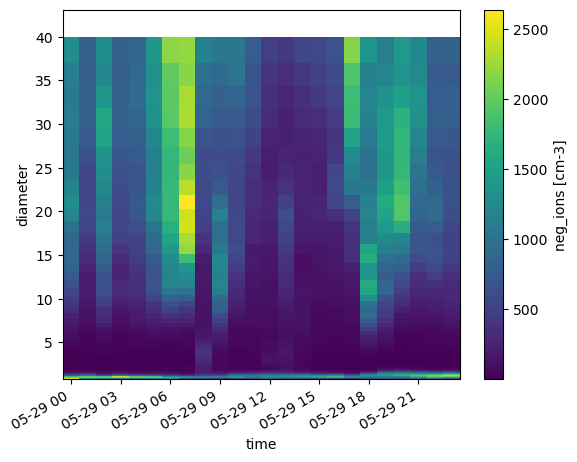

In [58]:
neg_ions.sel(time='2024-05-29').T.plot()

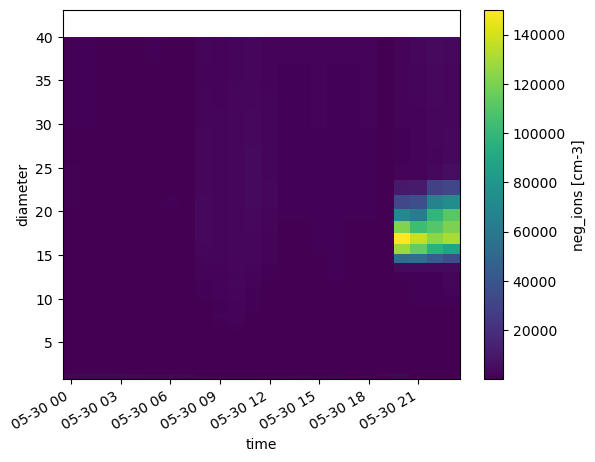

In [59]:
neg_ions.sel(time='2024-05-30').T.plot()

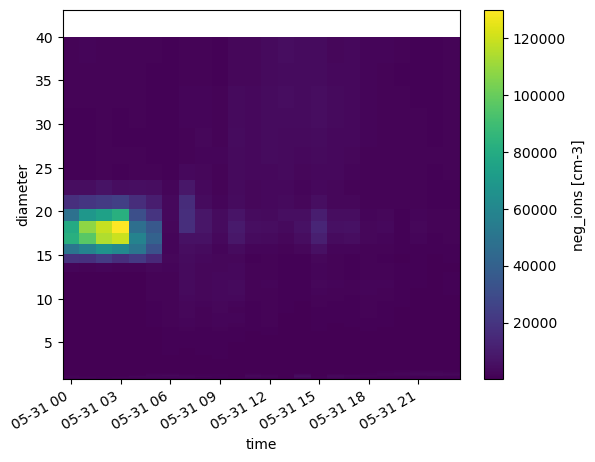

In [60]:
neg_ions.sel(time='2024-05-31').T.plot()

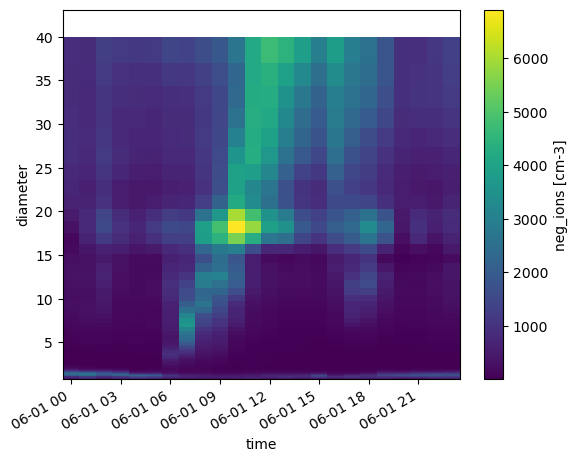

In [61]:
neg_ions.sel(time='2024-06-01').T.plot()

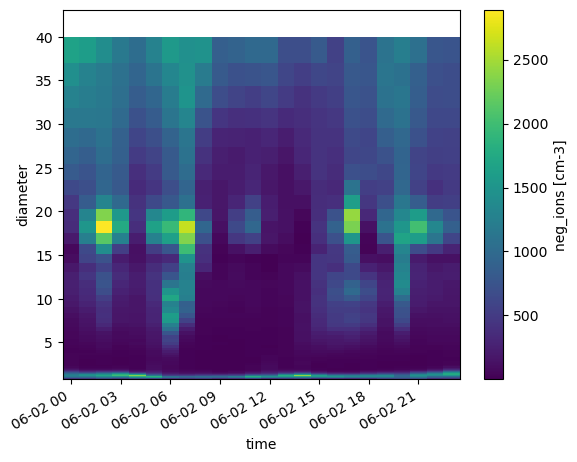

In [62]:
neg_ions.sel(time='2024-06-02').T.plot()

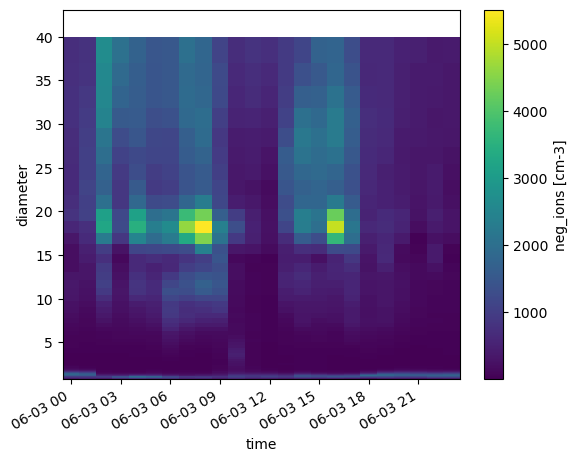

In [63]:
neg_ions.sel(time='2024-06-03').T.plot()

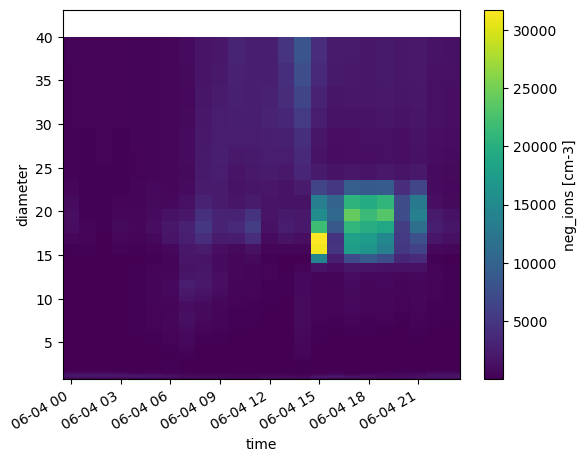

In [64]:
neg_ions.sel(time='2024-06-04').T.plot()

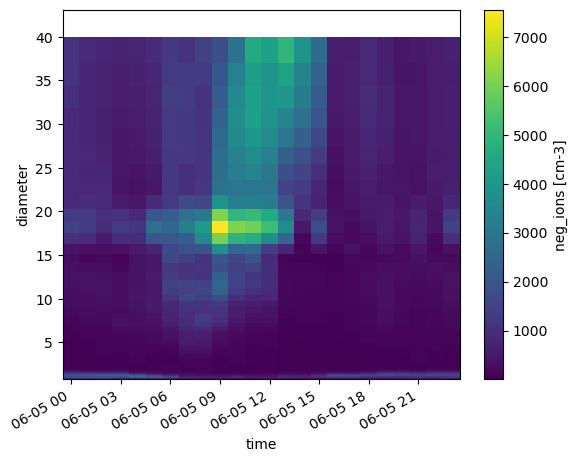

In [65]:
neg_ions.sel(time='2024-06-05').T.plot()

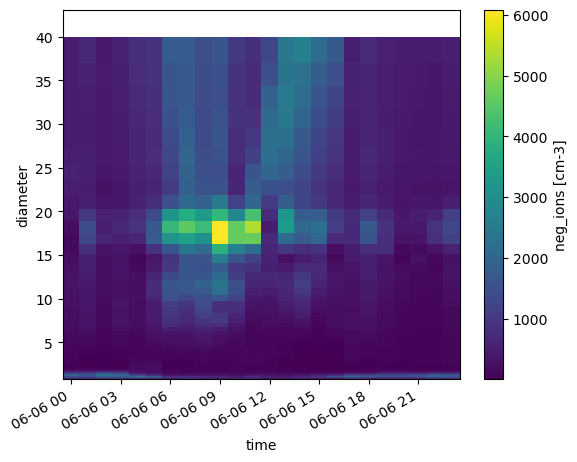

In [66]:
neg_ions.sel(time='2024-06-06').T.plot()

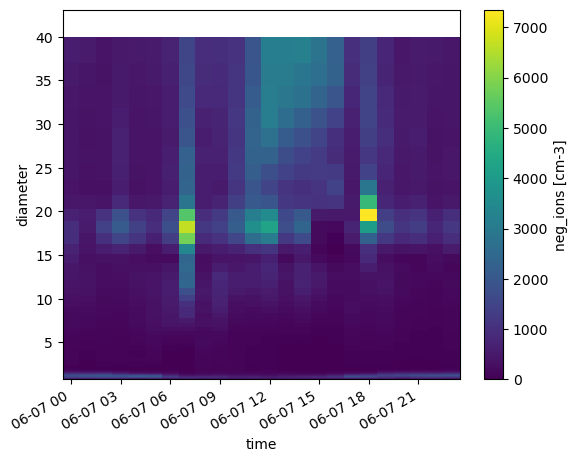

In [67]:
neg_ions.sel(time='2024-06-07').T.plot()

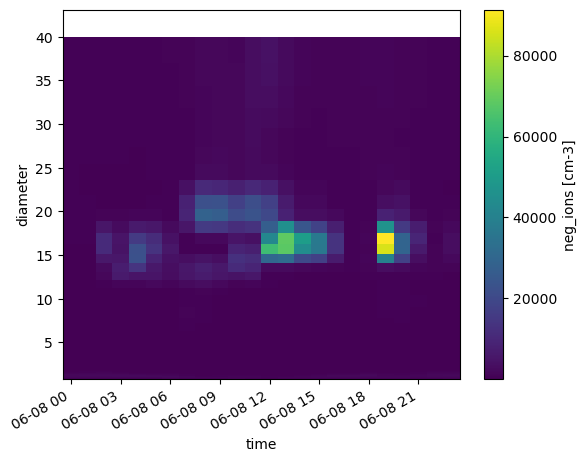

In [68]:
neg_ions.sel(time='2024-06-08').T.plot()

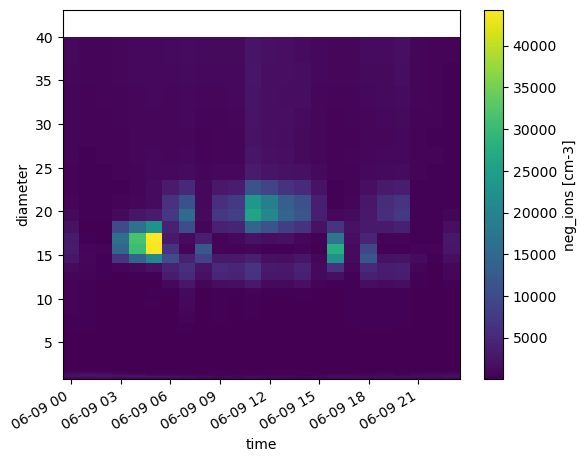

In [69]:
neg_ions.sel(time='2024-06-09').T.plot()

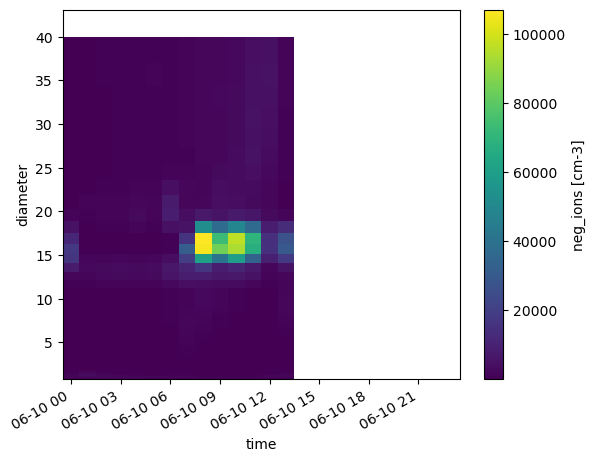

In [70]:
neg_ions.sel(time='2024-06-10').T.plot()

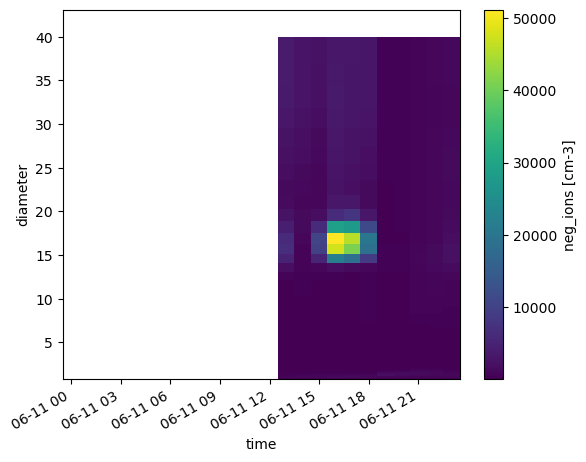

In [71]:
neg_ions.sel(time='2024-06-11').T.plot()

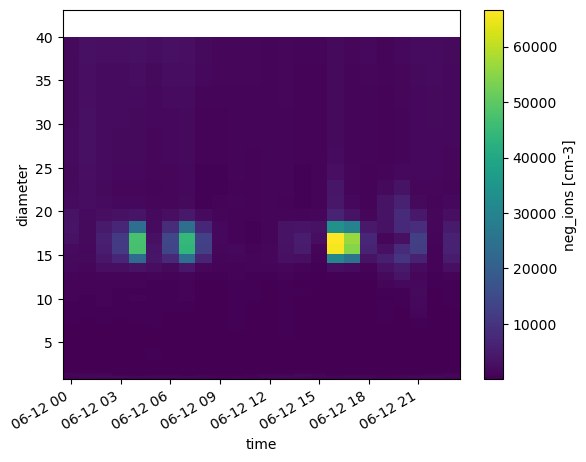

In [72]:
neg_ions.sel(time='2024-06-12').T.plot()

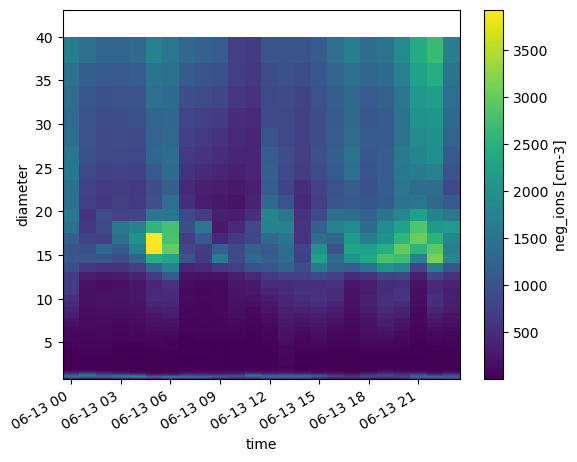

In [73]:
neg_ions.sel(time='2024-06-13').T.plot()

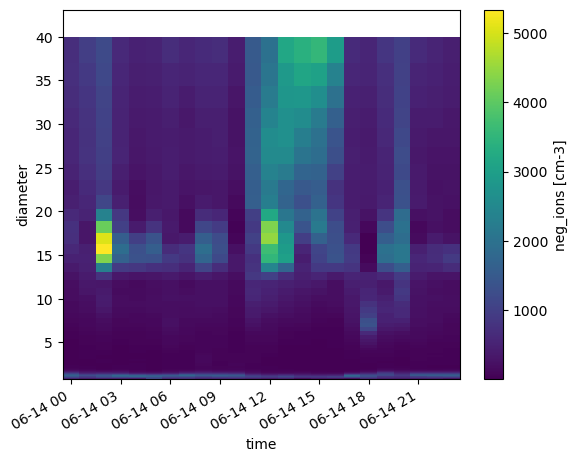

In [74]:
neg_ions.sel(time='2024-06-14').T.plot()

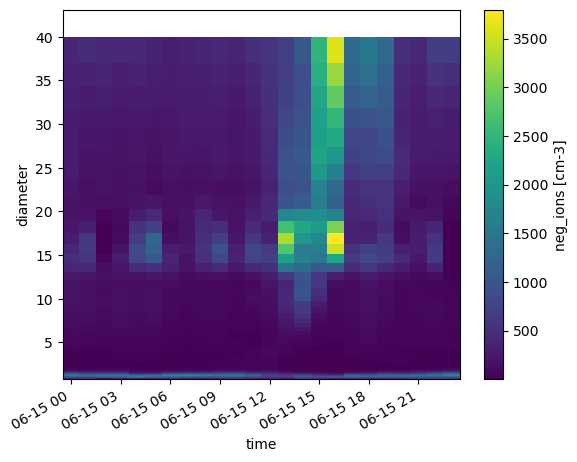

In [75]:
neg_ions.sel(time='2024-06-15').T.plot()

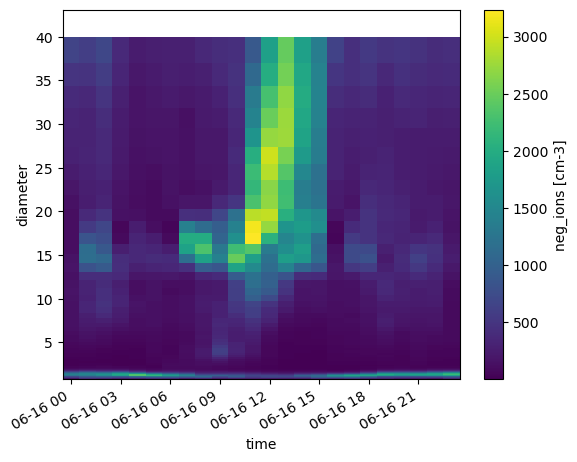

In [76]:
neg_ions.sel(time='2024-06-16').T.plot()

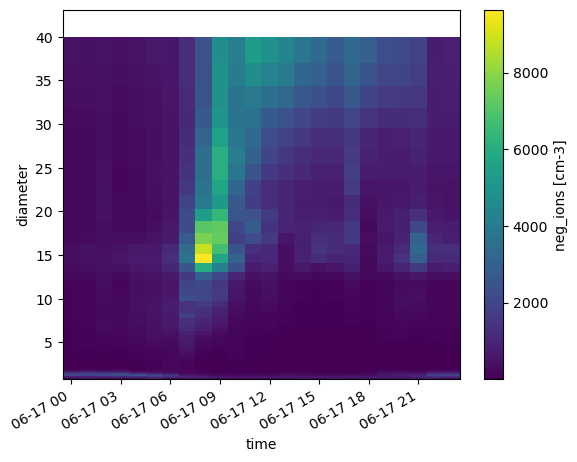

In [77]:
neg_ions.sel(time='2024-06-17').T.plot()

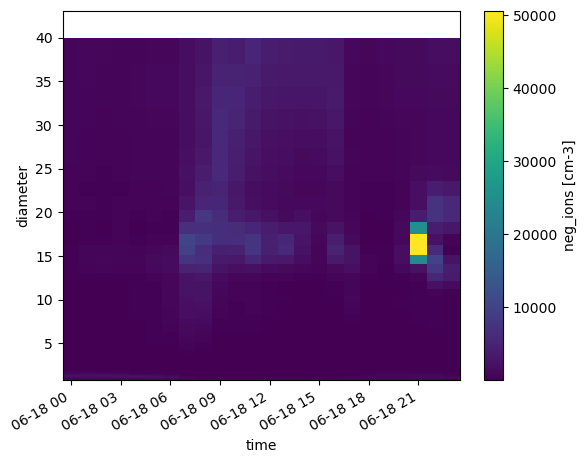

In [78]:
neg_ions.sel(time='2024-06-18').T.plot()

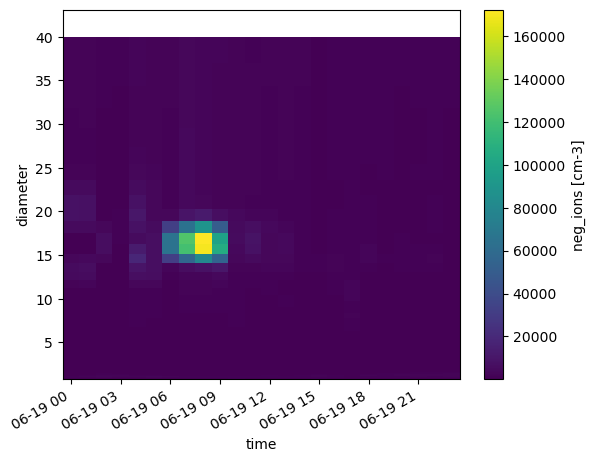

In [79]:
neg_ions.sel(time='2024-06-19').T.plot()

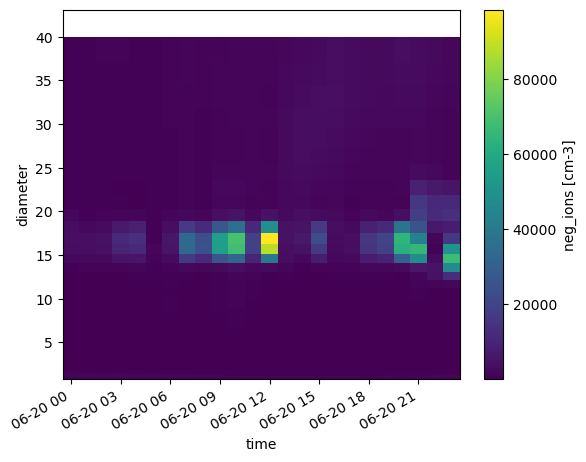

In [80]:
neg_ions.sel(time='2024-06-20').T.plot()

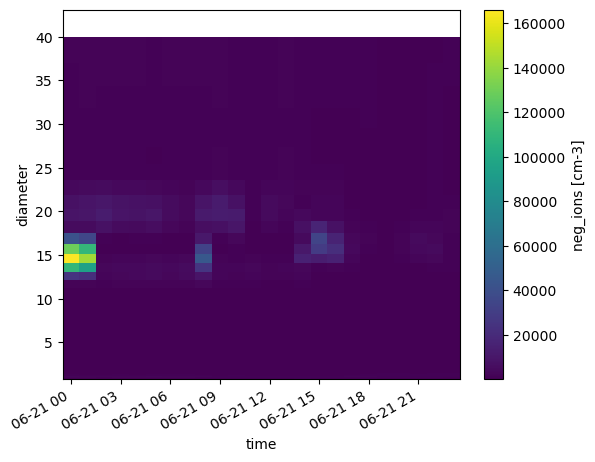

In [81]:
neg_ions.sel(time='2024-06-21').T.plot()

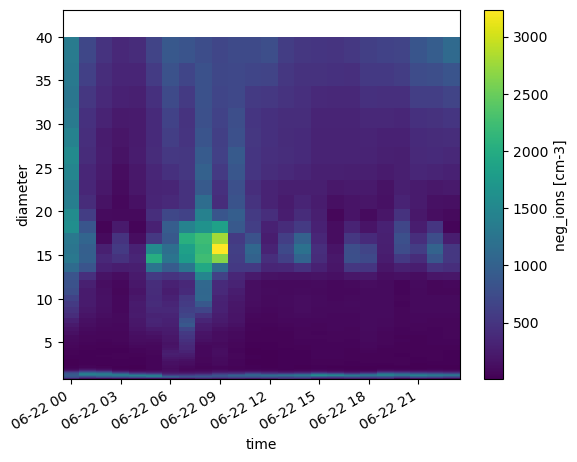

In [82]:
neg_ions.sel(time='2024-06-22').T.plot()

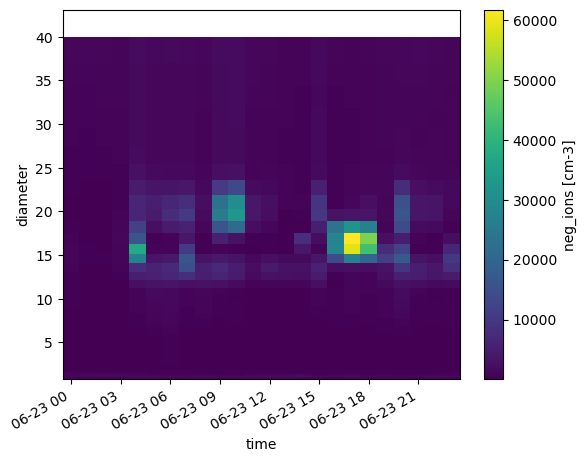

In [83]:
neg_ions.sel(time='2024-06-23').T.plot()

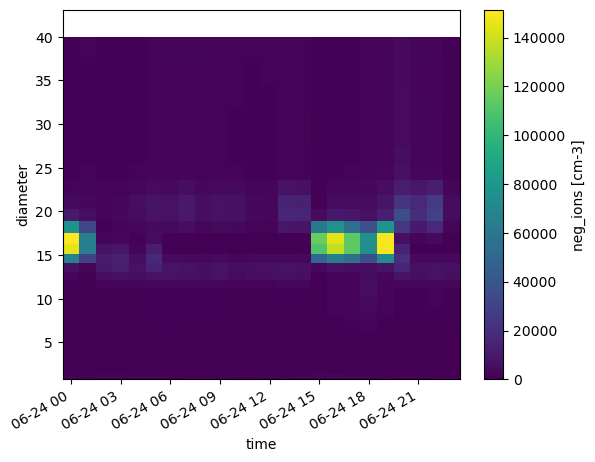

In [84]:
neg_ions.sel(time='2024-06-24').T.plot()

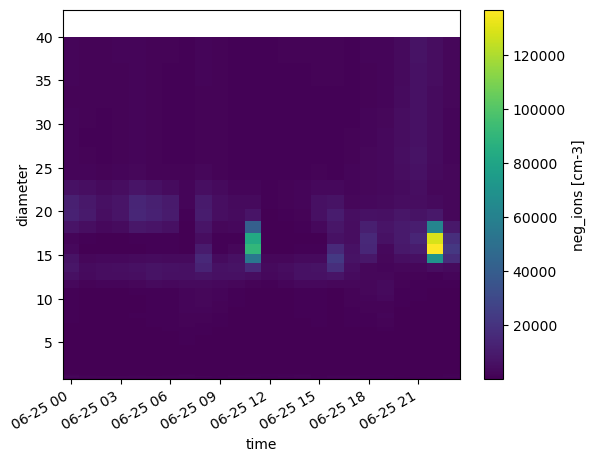

In [85]:
neg_ions.sel(time='2024-06-25').T.plot()

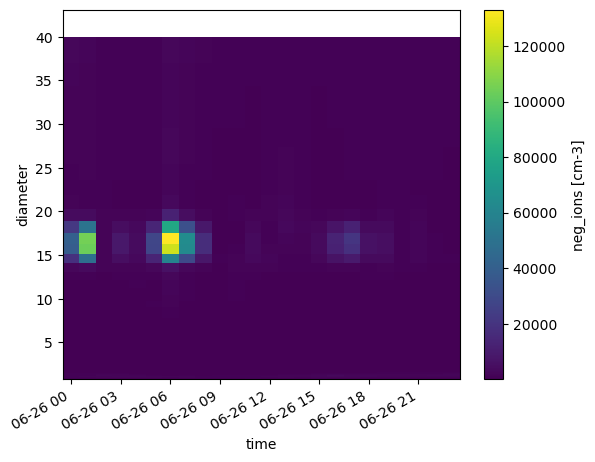

In [86]:
neg_ions.sel(time='2024-06-26').T.plot()

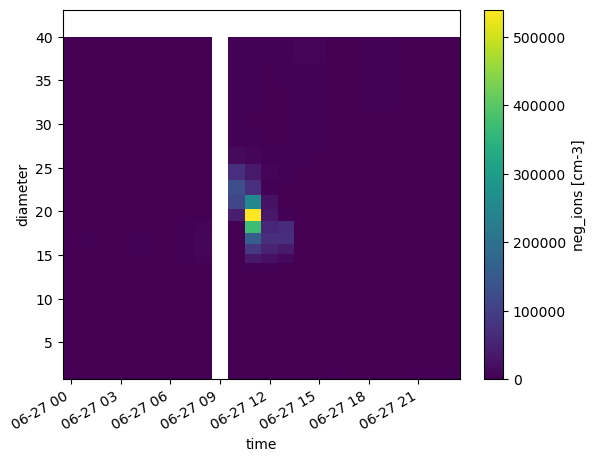

In [87]:
neg_ions.sel(time='2024-06-27').T.plot()

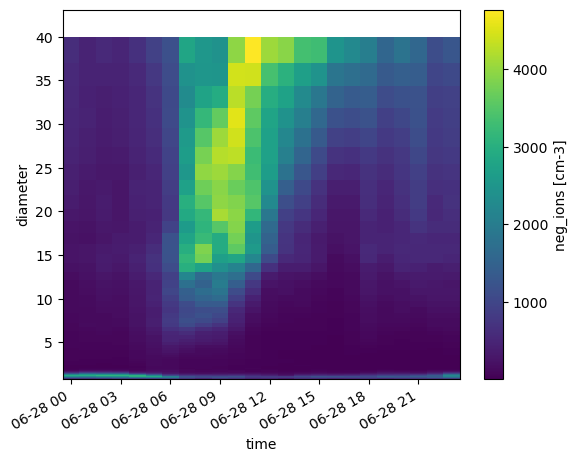

In [88]:
neg_ions.sel(time='2024-06-28').T.plot()

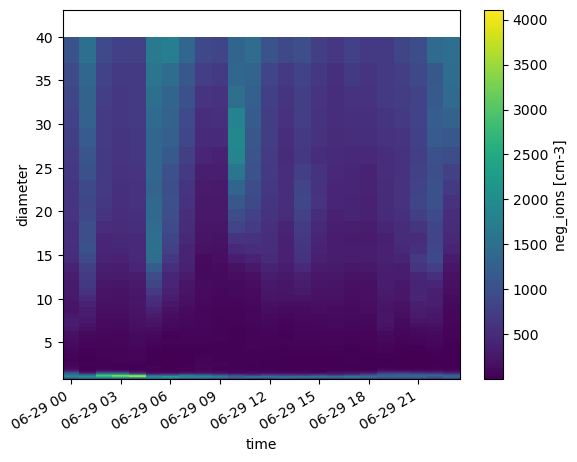

In [89]:
neg_ions.sel(time='2024-06-29').T.plot()

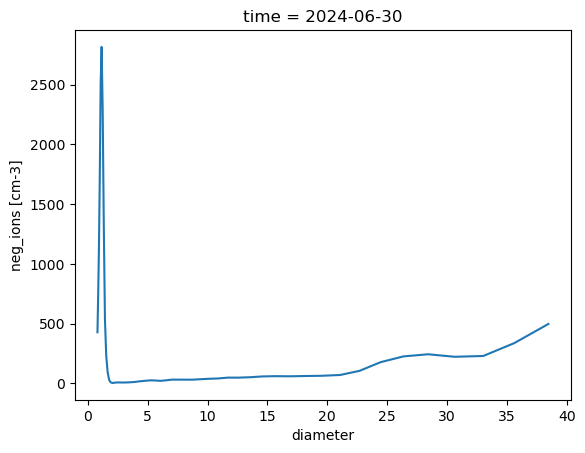

In [90]:
neg_ions.sel(time='2024-06-30').T.plot()

#### From the above spectral plots, I identified manually:
    1. NPF-event days -> 14 days
    2. Undefined -> 13 days
    3. Non-event days -> 19 days

In [94]:
npf_days=('2024-05-18','2024-05-19','2024-05-21','2024-05-22','2024-05-26','2024-06-01','2024-06-05','2024-06-06','2024-06-07','2024-06-14','2024-06-15','2024-06-16','2024-06-17','2024-06-28')
undef = ('2024-05-16','2024-05-23','2024-05-24','2024-05-25','2024-05-27','2024-05-28','2024-05-29','2024-06-02','2024-06-03','2024-06-13','2024-06-22','2024-06-29','2024-06-30')
nonevent = ('2024-05-17','2024-05-20','2024-05-30','2024-05-31','2024-06-04','2024-06-08','2024-06-09','2024-06-10','2024-06-11','2024-06-12','2024-06-18','2024-06-19','2024-06-20','2024-06-21','2024-06-23','2024-06-24','2024-06-25','2024-06-26','2024-06-27')

In [98]:
# dates from the days data (ignoring the time part)
unique_dates0 = pd.to_datetime(npf_days).normalize()
unique_dates1 = pd.to_datetime(undef).normalize()
unique_dates2 = pd.to_datetime(nonevent).normalize()

In [100]:
# Create a condition to filter the monthly data for these dates
condition0 = neg_ions.time.dt.floor('D').isin(unique_dates0)
condition1 = neg_ions.time.dt.floor('D').isin(unique_dates1)
condition2 = neg_ions.time.dt.floor('D').isin(unique_dates2)

# Filter the monthly data
npf_event = neg_ions.where(condition0, drop=True)
undefined = neg_ions.where(condition1, drop=True)
non_event = neg_ions.where(condition2, drop=True)

In [101]:
npf_event

<xarray.DataArray 'neg_ions' (time: 336, diameter: 55)>
array([[ 477.25713068,  662.44014005,  786.67562837, ...,  677.03498451,
         764.56212362,           nan],
       [ 511.51396604,  662.76044839,  704.47414143, ..., 1044.02039517,
        1074.7944015 ,           nan],
       [ 452.30507803,  635.01821568,  798.29772853, ...,  729.94769787,
         731.98196197,           nan],
       ...,
       [ 451.18336875,  701.37181262,  925.00213973, ..., 1383.96829165,
        1567.93611232,           nan],
       [ 392.68409956,  736.28006341, 1069.62349169, ...,  981.07695618,
        1115.41047537,           nan],
       [ 515.338892  ,  842.99971463, 1285.64502478, ..., 1060.85038361,
        1272.81176273,           nan]])
Coordinates:
  * diameter  (diameter) float64 0.8029 0.8628 0.9273 ... 35.61 38.46 41.55
  * time      (time) datetime64[ns] 2024-05-18 ... 2024-06-28T23:00:00
Attributes:
    units:        cm-3
    description:  Negative ion number-size distribution (dN/dlogDp)

In [102]:
undefined

<xarray.DataArray 'neg_ions' (time: 289, diameter: 55)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [ 319.16842128,  576.25318151,  811.83706813, ..., 1115.13202962,
        1399.94144341,           nan],
       [ 417.30305328,  684.91809704,  998.64522543, ..., 1450.28229058,
        1462.18988711,           nan],
       [ 428.38607333,  740.36086594, 1139.6123975 , ...,  336.95982052,
         497.59167879,           nan]])
Coordinates:
  * diameter  (diameter) float64 0.8029 0.8628 0.9273 ... 35.61 38.46 41.55
  * time      (time) datetime64[ns] 2024-05-16 ... 2024-06-30
Attributes:
    units:        cm-3
    description:  Negative ion number-size distribution (dN/dlogDp)

In [103]:
non_event

<xarray.DataArray 'neg_ions' (time: 456, diameter: 55)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [322.02117657, 533.08395981, 821.15963574, ..., 832.42720557,
        895.17233983,          nan],
       [253.01332298, 497.75654668, 871.85284605, ..., 681.88972237,
        750.74361948,          nan],
       [412.18641276, 685.05619163, 982.07397602, ..., 576.79278743,
        655.87419229,          nan]])
Coordinates:
  * diameter  (diameter) float64 0.8029 0.8628 0.9273 ... 35.61 38.46 41.55
  * time      (time) datetime64[ns] 2024-05-17 ... 2024-06-27T23:00:00
Attributes:
    units:        cm-3
    description:  Negative ion number-size distribution (dN/dlogDp)

the mean diurnal cycles of meteorological variables during NPF event, undefined, and non–NPF event days

the mean diurnal cycles of small, intermediate, and large charged particles on NPF event, undefined, and non–NPF event days

the mean diurnal cycles of black carbon (BC), sulphuric acid (H2SO4) dimer, and condensation sink (CS) concentrations on NPF event, undefined, and non–NPF event days

In [35]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
small_neg_ions = small_neg_ions.mean(dim='diameter').to_dataframe().reset_index()
small_neg_ions['time'] = pd.to_datetime(small_neg_ions['time'])
small_neg_ions_df = small_neg_ions.set_index('time')

# Statistical summary
small_neg_ions_df.describe()

,neg_ions
count,1007.000000
mean,827.414573
std,353.175334
min,191.757918
25%,567.277006
50%,795.184340
75%,1027.742091
max,4342.143601


In [38]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
small_pos_ions = small_pos_ions.mean(dim='diameter').to_dataframe().reset_index()
small_pos_ions['time'] = pd.to_datetime(small_pos_ions['time'])
small_pos_ions_df = small_pos_ions.set_index('time')

# Statistical summary
small_pos_ions_df.describe()

,pos_ions
count,1007.000000
mean,948.439478
std,373.906032
min,77.546723
25%,696.572720
50%,914.831419
75%,1177.181043
max,5131.277780


In [36]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
intermediate_neg_ions = intermediate_neg_ions.mean(dim='diameter').to_dataframe().reset_index()
intermediate_neg_ions['time'] = pd.to_datetime(intermediate_neg_ions['time'])
intermediate_neg_ions_df = intermediate_neg_ions.set_index('time')

# Statistical summary
intermediate_neg_ions_df.describe()

,neg_ions
count,1007.000000
mean,89.398177
std,125.067993
min,5.936368
25%,41.449638
50%,61.778435
75%,97.848207
max,2567.038970


In [39]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
intermediate_pos_ions = intermediate_pos_ions.mean(dim='diameter').to_dataframe().reset_index()
intermediate_pos_ions['time'] = pd.to_datetime(intermediate_pos_ions['time'])
intermediate_pos_ions_df = intermediate_pos_ions.set_index('time')

# Statistical summary
intermediate_pos_ions_df.describe()

,pos_ions
count,1007.000000
mean,94.687042
std,890.278657
min,-162.192623
25%,17.958367
50%,34.889410
75%,72.426970
max,28058.007909


In [37]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
large_neg_ions = large_neg_ions.mean(dim='diameter').to_dataframe().reset_index()
large_neg_ions['time'] = pd.to_datetime(large_neg_ions['time'])
large_neg_ions_df = large_neg_ions.set_index('time')

# Statistical summary
large_neg_ions_df.describe()

,neg_ions
count,1007.000000
mean,2338.416049
std,5792.397301
min,33.382587
25%,338.440074
50%,675.154164
75%,1665.997885
max,96688.503003


In [40]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
large_pos_ions = large_pos_ions.mean(dim='diameter').to_dataframe().reset_index()
large_pos_ions['time'] = pd.to_datetime(large_pos_ions['time'])
large_pos_ions_df = large_pos_ions.set_index('time')

# Statistical summary
large_pos_ions_df.describe()

,pos_ions
count,1007.000000
mean,644.226926
std,874.946686
min,2.148323
25%,240.620474
50%,432.037005
75%,779.234123
max,19028.169008


In [41]:
# Total
pos_ions = pos_ions.mean(dim='diameter').to_dataframe().reset_index()
pos_ions['time'] = pd.to_datetime(pos_ions['time'])
pos_ions_df = pos_ions.set_index('time')

# Statistical summary
pos_ions_df.describe()

,pos_ions
count,1007.000000
mean,578.882921
std,737.831209
min,70.484091
25%,367.861417
50%,468.042937
75%,645.657819
max,16799.728671


In [42]:
# Total
neg_ions = neg_ions.mean(dim='diameter').to_dataframe().reset_index()
neg_ions['time'] = pd.to_datetime(neg_ions['time'])
neg_ions_df = neg_ions.set_index('time')

# Statistical summary
neg_ions_df.describe()

,neg_ions
count,1007.000000
mean,1040.703782
std,1775.329141
min,89.739050
25%,411.771323
50%,548.151784
75%,903.357390
max,29380.797455


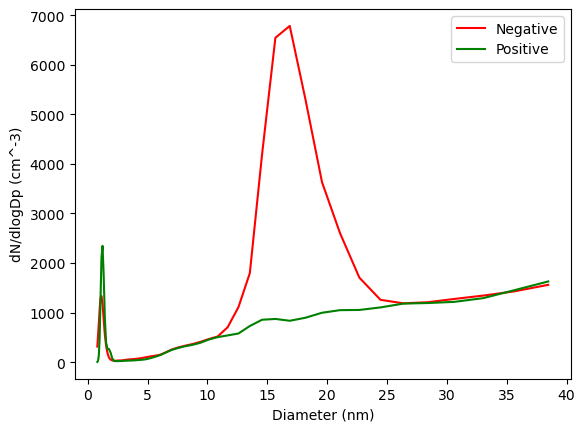

In [45]:
# Total particles dist over 
neg_i = dataset.neg_ions.mean(dim='time')
pos_i = dataset.pos_ions.mean(dim='time')

#plot
# Plotting both the curves simultaneously 
plt.plot(neg_i['diameter'], neg_i.values, color='r', label='Negative') 
plt.plot(pos_i['diameter'], pos_i.values, color='g', label='Positive') 

plt.xlabel('Diameter (nm)') 
plt.ylabel('dN/dlogDp (cm^-3)')

plt.legend()
plt.show()